In [2]:
# 1. Imports and Data Loading
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('/kaggle/input/pre-processed-data/netflix_processed.csv')

# 2. Build "soup" feature (if not already in processed file)
df['soup'] = (
    df['title'].fillna('') + ' ' +
    df['director'].fillna('') + ' ' +
    df['cast'].fillna('') + ' ' +
    df['listed_in'].fillna('') + ' ' +
    df['description'].fillna('')
).str.replace(',', ' ')

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])

# 4. Compute Similarity Matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 5. Recommendation Function
indices = pd.Series(df.index, index=df['title'].str.lower())

def recommend(title, n=5):
    idx = indices[title.lower()]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    rec_indices = [i[0] for i in sim_scores]
    return df[['title', 'listed_in']].iloc[rec_indices]

# 6. Example Usage
recommend('Kota Factory')


,title,listed_in
2353,chaman bahaar,"Comedies, Dramas, International Movies"
3466,girls hostel,"International TV Shows, TV Comedies, TV Dramas"
2472,betaal,"International TV Shows, TV Action & Adventure,..."
266,the creative indians,"Docuseries, International TV Shows"
749,l.a.’s finest,"Crime TV Shows, TV Action & Adventure, TV Come..."


                     title                                          listed_in
2353         chaman bahaar             Comedies, Dramas, International Movies
3466          girls hostel     International TV Shows, TV Comedies, TV Dramas
2472                betaal  International TV Shows, TV Action & Adventure,...
266   the creative indians                 Docuseries, International TV Shows
749          l.a.’s finest  Crime TV Shows, TV Action & Adventure, TV Come...
                 title                                          listed_in
1514      diamond city  Crime TV Shows, International TV Shows, TV Dramas
1593  kings of jo'burg  Crime TV Shows, International TV Shows, TV Dramas
4475          shirkers                                      Documentaries
2184          get even  British TV Shows, Crime TV Shows, Internationa...
108          dive club                 Kids' TV, TV Dramas, Teen TV Shows
Genre overlap for 'Kota Factory': [0, 2, 1, 1, 1]


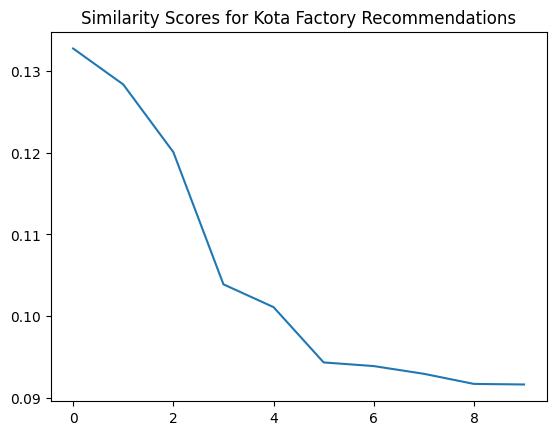

In [3]:
# 1. Imports and Data Loading
import pandas as pd
df = pd.read_csv('/kaggle/input/pre-processed-data/netflix_processed.csv')

# 2. Load or Rebuild Model
# (Use the model and recommend() function from model_building.ipynb)

# 3. Manual Test Cases
print(recommend('Kota Factory', n=5))
print(recommend('Blood & Water', n=5))

# 4. Quantitative Evaluation (if you have user ratings or favorites)
# For content-based, you can check if recommended titles share genres, directors, or actors

def genre_overlap(query_title, n=5):
    recs = recommend(query_title, n)
    query_genres = set(df[df['title'].str.lower() == query_title.lower()]['listed_in'].iloc[0].split(', '))
    overlaps = []
    for idx, row in recs.iterrows():
        rec_genres = set(row['listed_in'].split(', '))
        overlap = len(query_genres.intersection(rec_genres))
        overlaps.append(overlap)
    return overlaps

print("Genre overlap for 'Kota Factory':", genre_overlap('Kota Factory'))

# 5. (Optional) User Feedback Simulation
# Simulate feedback: If you have a small group, ask them to rate recommendations for a few titles

# 6. Visualization of Similarity Scores (Optional)
import matplotlib.pyplot as plt
scores = [x[1] for x in sorted(list(enumerate(cosine_sim[indices['kota factory']])), key=lambda x: x[1], reverse=True)[1:11]]
plt.plot(scores)
plt.title('Similarity Scores for Kota Factory Recommendations')
plt.show()
